<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Explore Python Data Visualization

_Authors: Alexander Combs (New York City), Dave Yerrington (San Francisco), Kevin Markham (DC), Jeff Hale (DC)_

---

We'll use pandas, Matplotlib, seaborn, and hvplot/Holoviews to create plots.

We'll cover line plots, scatter plots, bar plots, histograms, boxplots, heatmaps, and how to manipulate attributes with Matplotlib.

You'll do several exercises along the way.

## Learning Objectives

- **Practice** using different types of plots.
- **Use** pandas methods for plotting.
- **Create** line plots, bar plots, histograms, and box plots.
- **Know** when to use seaborn.
- **Create** heatmaps with seaborn.
- **Make** interactive plots by using hvplot/HoloViews for pandas backend plotting.


## Lesson Guide

- [pandas Plotting Options](#pandas-plots)
- [Line Plots](#line-plots)
- [Bar Plots](#bar-plots)
- [Exercise 1](#exercise2)
- [Histograms](#histograms)    
- [Scatter Plots](#scatter-plots)
- [Exercise 2](#exercise2)
- [Box Plots](#box-plots)    
- [Matplotlib Options](#matplotlib)
- [Using Seaborn](#using-seaborn)
- [Exercise 3](#exercise3)
- [Interactive pandas plotting hvplot/HoloViews](#hvplot)
- [Summary](#summary)

### Introduction

___

As a default, pandas uses the Matplotlib library to make plots. 

Pandas plotting methods often use similar parameter names as Matplotlib methods.

You can use Matplotlib functions to alter the plots. 

As we explore different types of plots, notice that many plots share similar arguments and act similarly. 

Import the usual things, plus the seaborn library for use later.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

# reset back end plotting library to matplotlib if re-running notebook
pd.options.plotting.backend = 'matplotlib'

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Check your pandas version.

In [22]:
print(pd.__version__)
print(sns.__version__)

1.0.3
0.10.0


### Create data for examples

Notice how we use a numpy function to create random normal data.

In [23]:
df = pd.DataFrame(
    np.random.randn(10, 4), 
    columns=['col1', 'col2', 'col3', 'col4'],
    index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
)
df

,col1,col2,col3,col4
a,-0.645003,2.142623,0.669140,-0.348009
b,-2.134479,-2.036177,0.368153,-0.014398
c,-1.269911,0.233491,-0.160057,-1.165411
d,-0.364415,-1.147372,-0.604495,0.843487
e,-0.099462,0.061607,-1.763879,-0.573137
f,-1.041549,0.491427,1.316449,-0.479053
g,0.882359,-2.734983,1.199884,-3.267380
h,-0.884572,0.453779,-0.295134,0.082963
i,0.622832,-0.178326,-1.636452,0.876225
j,-0.057580,2.168992,-1.055362,0.672221


### Choosing the right type of visualization

The choice of visualization should depend what you are trying to show. Here is a flowchart you can use to determine the best type of visualizations.

![Chart Suggestions](./assets/images/chart_suggestions.png)

What's wrong with this visualization?

How would you improve it?

<a id='pandas-plots'> </a>
## Plotting in Pandas
---
- **Objective:** Use pandas methods for plotting.

There are two ways to specify the type of chart from pandas without importing anything else. 

For example, for a bar graph, you can call `df.plot.bar(x,y)` or `df.plot(kind='bar')` in the arguments. 

## 10 plot types are available from within pandas:

- `area()`: stacked area plot
- `bar()`: vertical bar plot
- `barh()`: horizontal bar plot
- `box()`: box plot of columns
- `hexbin()`: hexagonal bin plot
- `kde()`: KDE plot (same as `density()`)
- `line()`: line plot
- `pie()`: pie plot
- `scatter()`: scatter plot

## Calling a `.plot()` method on a DataFrame

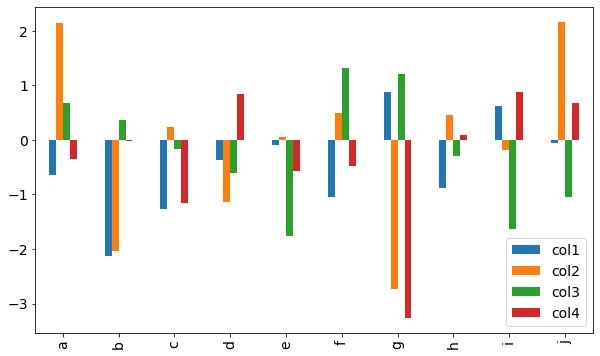

In [24]:
df.plot(kind='bar');

## Calling on a Series

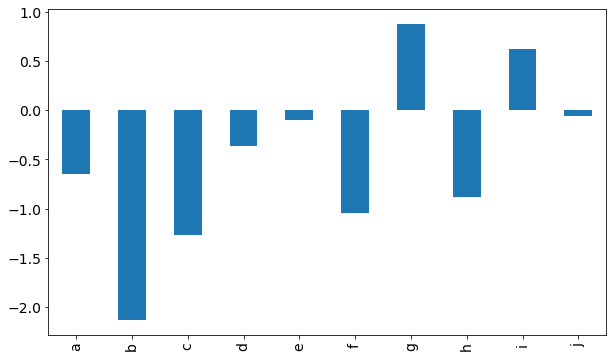

In [25]:
df['col1'].plot(kind='bar')

There are multiple ways to call the same plot in pandas. There are also multiple ways to call the same plot in Matplotlib. 😕

### Cleaning Up
If you don't want the verbiage above the plot, put a semicolon at the end of your code. For example:

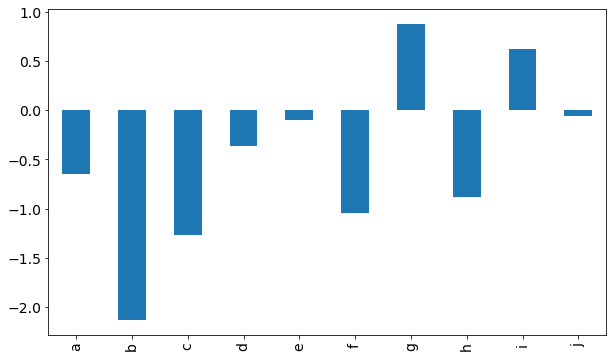

In [26]:
df['col1'].plot.bar();

😀

# Essential Plots
---

<a id="line-plots"></a>
## Line plots
Show the trend of a numerical variable over time

- **Objective:** **Create** line plots, bar plots, scatter plots, histograms, and box plots.

### Line Plot With a `DataFrame`

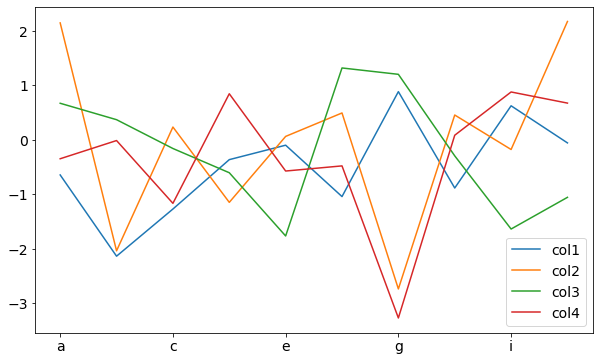

In [27]:
df.plot()

### How to change the size of a plot

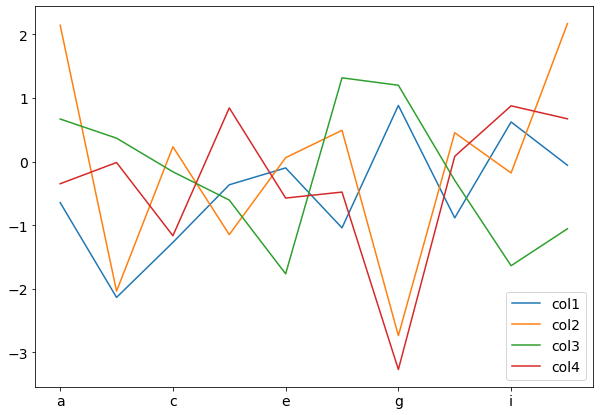

In [28]:
df.plot(figsize =(10,7))

Use the keyword argument `figsize=(, )` with  width, height in the tuple.

Technically the `figsize` is 15 "inches" (width) by 8 "inches" (height).

### How to change the color of a plot

### How to change the style of individual lines

`:r` = dotted line, `vb` = triangle_down

## Every chart should have a title.

Add one by passing the keyword argument `title='your_string_title`.

### Load in data sets for visualization examples.

The Boston Housing data dictionary can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

#### Read in the Boston housing data.

In [34]:
housing_csv = './datasets/boston_housing_data.csv'
housing = pd.read_csv(housing_csv)

FileNotFoundError: [Errno 2] File ./datasets/boston_housing_data.csv does not exist: './datasets/boston_housing_data.csv'

#### Read in the drinks data.

In [35]:
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = './datasets/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

FileNotFoundError: [Errno 2] File ./datasets/drinks.csv does not exist: './datasets/drinks.csv'

#### Read in the ufo data.

In [ ]:
ufo = pd.read_csv('./datasets/ufo.csv')
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year

#### Count the number of ufo reports each year (and sort by year).

In [ ]:
       # Remember! Read method chains left to right.

#### Compare with line plot -- UFO sightings by year. (Ordering by year makes sense.)

#### COMMON MISTAKE: Don't use a line plot when the x-axis shouldn't be ordered!

**Important:** A line plot is the wrong type of plot for this data. Any set of countries can be rearranged misleadingly to illustrate a negative trend, as we did here. 

### What chart type should you use instead?

#### Plot the same data as a (horizontal) bar plot

### Better?

### Challenge: Create a line plot of `ZN` and `INDUS` in the housing data. 

- For `ZN`, use a solid green line. For `INDUS`, use a blue dashed line.
- Change the figure size to a width of 12 and height of 8.


#### First, preprocess the data. Notice the extra spaces in some of the column names!

In [ ]:
housing.columns

#### Clean them up by removing the spaces.

In [ ]:
housing.columns = 
housing.columns

<a id="bar-plots"></a>
## Bar Plots: 
---
Show a numerical comparison across different categories

#### Count the number of countries in each continent.

#### Compare with bar plot.

#### Calculate the mean alcohol values for each continent.

### Side-by-side (grouped) bar plots

#### Sort the continent x-axis by a particular column.

Let's sort by beer.

## Stacked bar plot

Group by continent.

In [ ]:
grouped_df = 
grouped_df

Drop the liters column and make a stacked bar chart.

In [ ]:
grouped_df.drop('liters', axis=1).plot(kind='bar', stacked=True);

### Be careful with stacked bar charts! Why?

How could we sort this by beer?

### Use Matplotlib commands to access chart styles

Set a variable named `ax` to the result of calling `pd.plot()`. With matplotlib as the backend plotting library, the axis object is returned. 

This axis object has many attributes that you can set to change the layout of the chart.

In [ ]:
ax = df.plot(kind='bar', figsize=(15,3))

# Set the title.
ax.set_title('Some Kinda Plot Thingy', fontsize=21, y=1.01)

# Move the legend.
ax.legend(loc=1)

# x-axis labels
ax.set_ylabel('Important y-axis info', fontsize=16);

# y-axis labels
ax.set_xlabel('Meaningless x-axis info', fontsize=16);

The matplotlib API is antiquated and has multiple ways of interfacing with it. 

<a id='exercise1'> </a>
### Exercise 1
___

#### Create a bar chart using `col1` and `col2`.

#### Give the plot a title of your choosing and move the legend to the lower-left corner.

#### Do the same thing but with horizontal bars and move the legend to the upper-left corner.

<a id="histograms"></a>
## Histograms: 
---
Show the distribution of a numeric variable.

#### Sort the beer column and think about how you'd split it into three groups based on the values.

#### Compare the above values with a histogram.
About how many of the points above are in the groups 1-125, 125-250, and 250-376?

#### Try more bins. The keyword argument is 'bins'. It takes the range of the data and divides it into `n` evenly spaced bins.

#### Compare the histogram with `kde` (kernel density estimation) plot. 

A kde plot attempts to estimate an underlying distribution.

#### Making histograms of DataFrames 

### How do you feel about that?

### Single Histogram

In [ ]:
norm = np.random.standard_normal(5000)   # This is a NumPy function in action

In [ ]:
  # Pandas can read a NumPy ndarray right into a Series or DataFrame

### Another bins example

Choose bins wisely. 

Does this convey meaningful information?

<a id="scatter-plots"></a>
## Scatter plots: 
---
Show the relationship between two numerical variables


#### Select the beer and wine columns and sort by beer.

#### Compare with scatter plot.

#### Add transparency 
Helpful for illustrating density!

#### Vary point color by spirit servings.

What kind of colormap is this? 

It would be nice if we could hover over a point and learn what country it represented.

<a id='exercise2'> </a>
# Exercise 2

#### Create a histogram with pandas for the `MEDV` column from the housing data. Set the bins to 20.

#### Give the plot a title, name the x-axis label, change the color to red, and change the number of bins to 50.

#### Create a scatterplot of spirit and wine from the drinks dataset

Make a horizontal bar plot of the mean column values for spirit, beer, and wine.

<a id="box-plots"></a>
## Box Plots 
---
Show quartiles (and outliers) for one or more numerical variables

We can use boxplots to quickly summarize distributions.

Also called a box and whiskers plot.

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(It's more useful than mean and standard deviation for describing skewed distributions.)

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

Different folks/programs put the whiskers in different places:

> The whiskers can represent several possible alternative values, among them:
> the minimum and maximum of all of the data 
> one standard deviation above and below the mean of the data
> the 9th percentile and the 91st percentile
> the 2nd percentile and the 98th percentile
-https://en.wikipedia.org/wiki/Box_plot

In Matplotlib, the whiskers are at the location of the furthest from the median data points that aren't outliers.

Outliers are shown as individual points and are points outside the following:
- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

### Let's see how box plots are generated so we can best interpret them.

#### Sort the spirit column and return just the values using the recommended pandas method `.to_numpy()`.

#### Show summary statistics for spirit with `.describe()`.

#### Compare with box plot.

#### Include multiple variables.

### Use a box plot to preview the distributions in the housing data

### Plotting options

#### View the association between the variables `ZN` and `INDUS` using a scatter plot

### Use a list comprehension to change the size of the scatter plot dots

This list comprehension sets the point sizes ('s') to be the squares of the values in `housing['DIS']`.

<a id="matplotlib"></a>
## Understanding Matplotlib (Figures, Subplots, and Axes)

---

Matplotlib uses a blank canvas called a figure.

Within this canvas, we can create smaller objects called axes.

You can unpack both the figure and axis from `plt.subplots()`. Passing the arguments `(2,3)` creates a 2 row by 3 column grid.

Pandas allows us to plot to a specified axes if we pass the axes object to the ax parameter.

<a id="additional-topics"></a>

## Saving a plot to a file

---

In [ ]:
  # Save to file!

## More complex plots from `pandas.plotting`

---

Pandas has other, more advanced, plotting methods that must be explicitly imported. For example:

If you are doing something more advanced for exploratory data analysis, you probably want to use seaborn because it usually makes nicer looking plots out of the box.

<a id="seaborn"></a>
# Seaborn
---

- **Objective:** Learn about seaborn as a plotting option.

See the docs [here](https://seaborn.pydata.org/index.html).

Seaborn can make advanced plots with very little code. It's great for showing relationships between variables. For example, here's a nicer styled scatter matrix. You just call it a `pairplot` in seaborn.

## Seaborn `heatmap`
---

When you have many variables, a pairplot or scatter matrix can become impossible to read. We can still guage linear correlation using a heatmap of the correlation matrix.

### Make a heatmap of the correlations between variables in the housing data.

First use pandas `corr()` method to compute the correlations.

### Challenge 

The heatmap shows the same information on each side of the diagonal. 
Let's create a housing correlation heatmap without the information above the diagonal (so make a triangle). 

Hint: You would have to look online for an example of how to do this with the NumPy `mask` function. 

Now make space between each square in the heatmap and print each correlation.

That's not super readable. 

This colorscale is continuous and something divergent would be better for showing opposites. 

Let's make the chart bigger and change the colorscale to 'coolwarm'. 

Hint: You can't just pass `figsize=` to this method. You'd have to search online for answer or think about ways to access the underlying Matplotlib figure.

Using the pandas `.plot` API , create a scatter plot of two heatmap entries that have a strong positive correlation (near 1).

### Other Seaborn Charts
___

Let's use the drinks dataset to look at a seaborn [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot).

That's certainly more colorful! 

Seaborn plots can take make any arguments. 

If you need to drill down further to change something, remember it's all Matplotlib under the hood! Stack Overflow, Google, and hte docs are your friends!

There are many other chart types available with Seaborn. Many of them look much nicer and require less tweaking than a vanilla Matplolib plot or a pandas Matplotlib plot. 

The full list of seaborn chart types is in the docs [here](https://seaborn.pydata.org/api.html).

### Change the overall style for seaborn and Matplotlip.

Let's list available plot styles.

### Change to a different style

<a id='exercise3'> </a>
## Exercise 3

### Make heatmap of the drinks DataFrame.

#### Find the correlations.

#### Make a heatmap of the correlations.

#### Just show the bottom half of the matrix and make the colors nicer, make a space between each rectangle, and add the numeric correlation values to the plot.

In [ ]:
# make the mask to just show the bottom half


#### Which variables are  most strongly correlated?

<a id="holoviews"></a>
# Switching pandas plotting to hvplot/HoloViews

---
hvplot is a package you can install to use HoloViews for interactive plotting with pandas. HoloViews is built on Bokeh. Interactive plots are cool and you can save them. Here's a quick taste! 

### Step 1: Install
First install hvplot into your environment using conda. 

Note we need to install it from an alternative package channel - conda forge. We indicate the channel with the `-c` flag. 

Ideally we would install from the default conda channel, but that's not an option right now.

From your terminal, in the same conda environment you are using for this notebook run.

```conda install -c conda-forge hvplot```

You shouldn't need to restart your Jupyter server because you have run the `%autoreload 2` magic command above.

### Step 2: Configure pandas option
Set pandas backend plotting to `'hvplot'`.

### Step 3: Plot!
Plot from pandas with the same syntax you used above! 😃

Scroll over data points for information on indivual points via tooltips.

Check out the options in the icon menu to the right of the plot.

Note that not all argument options that work with the matplotlib backend will work with hvplot! 

Explore the other pandas plots with hvplot. 

 - [hvplot docs](https://hvplot.holoviz.org/user_guide/Viewing.html)
 - [HoloViews docs](https://holoviews.org/index.html)
 - [Bokeh docs](https://docs.bokeh.org/en/latest/index.html)

<a id="summary"></a>
### Summary

> Check for understanding

- How would you make a bar plot from pandas?
- What type of data would you use with a line chart?
- How many variables does a histogram require?
- What plotting library would you use for a heatmap?

### Recap

In this lesson, we showed examples how to create a variety of plots using Pandas and Matplotlib. We also showed how to use each plot to effectively display data.

Do not be concerned if you do not remember everything. No one remembers everything, work on being aware of what's available and creating the basic chart types in Matplotlib. You can always look up the arguments. 

Although there are many plot styles, many similarities exist between how each plot is drawn. 👍

We looked at:
- Line plots
- Bar plots
- Histograms
- Scatter plots
- Box plots

- How Matplotlib works
- Plotting in seaborn
- How to switch the pandas backend plotting library to hvplot/HoloViews